# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [25]:
# Initial imports
import os
import pandas as pd
import nltk as nltk
from dotenv import load_dotenv
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jason/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [26]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API")

In [27]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [28]:
# Fetch the Bitcoin news articles
btc_articles_dto = newsapi.get_everything(
    q="Bitcoin OR BTC", 
    language="en", 
    sort_by="relevancy")
print(f"Total Results: {btc_articles_dto['totalResults']}")

Total Results: 7845


In [29]:
# Fetch the Ethereum news articles
eth_articles_dto = newsapi.get_everything(
    q="Ethereum OR ETH", 
    language="en", 
    sort_by="relevancy")
print(f"Total Results: {eth_articles_dto['totalResults']}")

Total Results: 4173


In [30]:
# Create the Bitcoin sentiment scores DataFrame
btc_df = pd.DataFrame.from_dict(btc_articles_dto["articles"])
btc_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'reuters', 'name': 'Reuters'}",None,Rouble-crypto trading soars as sanctions hit R...,Trading volumes between the Russian rouble and...,https://www.reuters.com/markets/europe/rouble-...,https://www.reuters.com/pf/resources/images/re...,2022-02-28T17:53:00Z,"LONDON, Feb 28 (Reuters) - Trading volumes bet..."
1,"{'id': 'reuters', 'name': 'Reuters'}",None,Cryptocurrencies in a time of war - Reuters.com,Cryptocurrencies have been close to the headli...,https://www.reuters.com/technology/cryptocurre...,https://www.reuters.com/resizer/o-neidYH62soGC...,2022-03-04T15:01:00Z,"LONDON, March 4 (Reuters) - Cryptocurrencies h..."
2,"{'id': 'the-verge', 'name': 'The Verge'}",Elizabeth Lopatto,How Ukrainians are fundraising in cryptocurrency,Millions of dollars of cryptocurrency have flo...,https://www.theverge.com/2022/2/26/22952357/uk...,https://cdn.vox-cdn.com/thumbor/teEVxppIZ_JTW-...,2022-02-26T20:29:04Z,Illustration by James Bareham / The Verge\r\n\...
3,"{'id': None, 'name': 'New York Times'}",Katie Benner,Justice Dept. Announces Raft of Changes Meant ...,The moves came a week after the department mad...,https://www.nytimes.com/2022/02/17/us/politics...,https://static01.nyt.com/images/2022/02/17/us/...,2022-02-17T23:51:49Z,"Even in cyberspace, the Department of Justice ..."
4,"{'id': None, 'name': 'Kitco NEWS'}",http://www.facebook.com/kitconews,Is crypto winter over? Bitcoin price jumps tow...,<ol><li>Is crypto winter over? Bitcoin price j...,https://www.kitco.com/news/2022-03-01/Is-crypt...,https://www.kitco.com/news/2022-03-01/images/s...,2022-03-01T22:03:00Z,(Kitco News) The escalating Russia-Ukraine cri...


In [31]:
# Create the Ethereum sentiment scores DataFrame
eth_df = pd.DataFrame.from_dict(eth_articles_dto["articles"])
eth_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'Investorplace.com'}",InvestorPlace,"The Market Has Spoken, and It Says Ethereum Is...","Technical analysis isn’t a perfect tool, but i...",https://investorplace.com/2022/02/the-market-h...,https://images.readwrite.com/wp-content/upload...,2022-02-17T17:10:12Z,"Technical analysis isnt a perfect tool, but it..."
1,"{'id': 'the-verge', 'name': 'The Verge'}",Elizabeth Lopatto,How Ukrainians are fundraising in cryptocurrency,Millions of dollars of cryptocurrency have flo...,https://www.theverge.com/2022/2/26/22952357/uk...,https://cdn.vox-cdn.com/thumbor/teEVxppIZ_JTW-...,2022-02-26T20:29:04Z,Illustration by James Bareham / The Verge\r\n\...
2,"{'id': 'reuters', 'name': 'Reuters'}",None,ConsenSys valuation more than doubles to over ...,Blockchain technology firm ConsenSys said on T...,https://www.reuters.com/technology/consensys-v...,https://www.reuters.com/pf/resources/images/re...,2022-03-15T15:20:00Z,March 15 (Reuters) - Blockchain technology fir...
3,"{'id': 'business-insider', 'name': 'Business I...",prosen@insider.com (Phil Rosen),Bored Ape creator's purchase of CryptoPunks me...,"Yuga Labs, the creators behind Bored Ape Yacht...",https://markets.businessinsider.com/news/curre...,https://i.insider.com/622f3dd2843ef30018e6ddab...,2022-03-14T13:31:54Z,Bored Ape Yacht club creator Yugo Labs has bou...
4,"{'id': None, 'name': 'Entrepreneur'}",Eduardo Scheffler Zawadzki,Big mistake! Collector sells the NFT of a rock...,A confusion in the denomination used in a mark...,https://www.entrepreneur.com/article/422341,https://assets.entrepreneur.com/content/3x2/20...,2022-03-16T02:31:00Z,"NFT's (non-fungible tokens, that is, cryptogra..."


In [32]:
# Pass in the "raw" articles DTO and retrieve a new DataFrame w/ sentiment details
def createDataFrameWithSentiments(articles_dto):
    sentiments = []

    # Iterate through each article and create a new obj that contains the
    # relevant article data (text & date) + sentiment data
    for article in articles_dto["articles"]:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            
            sentiments.append({
                "text": text,
                "date": date,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu
                
            })
            
        except AttributeError:
            pass
        
    # Create DataFrame
    df = pd.DataFrame(sentiments)

    # Reorder DataFrame columns
    cols = ["date", "text", "compound", "positive", "negative", "neutral"]
    df = df[cols]

    return df

In [33]:
# Display a few rows of the new data frame
df_btc = createDataFrameWithSentiments(btc_articles_dto)
df_btc.head()

,date,text,compound,positive,negative,neutral
0,2022-02-28,"LONDON, Feb 28 (Reuters) - Trading volumes bet...",-0.2732,0.000,0.062,0.938
1,2022-03-04,"LONDON, March 4 (Reuters) - Cryptocurrencies h...",-0.1280,0.000,0.046,0.954
2,2022-02-26,Illustration by James Bareham / The Verge\r\n\...,-0.4588,0.000,0.083,0.917
3,2022-02-17,"Even in cyberspace, the Department of Justice ...",0.7351,0.147,0.000,0.853
4,2022-03-01,(Kitco News) The escalating Russia-Ukraine cri...,-0.5267,0.047,0.115,0.838


In [34]:
# Describe the Bitcoin Sentiment
df_btc.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.017585,0.065150,0.051700,0.883150
std,0.481099,0.059508,0.059301,0.061968
min,-0.771300,0.000000,0.000000,0.739000
25%,-0.353350,0.000000,0.000000,0.847750
50%,-0.025800,0.060500,0.042000,0.888500
75%,0.360375,0.092750,0.085000,0.932500
max,0.784500,0.214000,0.187000,1.000000


In [35]:
# Display a few rows of the new data frame
df_eth = createDataFrameWithSentiments(eth_articles_dto)
df_eth.head()

,date,text,compound,positive,negative,neutral
0,2022-02-17,"Technical analysis isnt a perfect tool, but it...",-0.2498,0.000,0.059,0.941
1,2022-02-26,Illustration by James Bareham / The Verge\r\n\...,-0.4588,0.000,0.083,0.917
2,2022-03-15,March 15 (Reuters) - Blockchain technology fir...,0.0000,0.000,0.000,1.000
3,2022-03-14,Bored Ape Yacht club creator Yugo Labs has bou...,0.5256,0.142,0.054,0.803
4,2022-03-16,"NFT's (non-fungible tokens, that is, cryptogra...",-0.1027,0.041,0.053,0.906


In [36]:
# Describe the Ethereum Sentiment
df_eth.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.188645,0.081700,0.037750,0.880450
std,0.375398,0.077593,0.035325,0.083971
min,-0.458800,0.000000,0.000000,0.713000
25%,-0.102700,0.000000,0.000000,0.809750
50%,0.214300,0.069000,0.047000,0.910500
75%,0.432825,0.142500,0.059500,0.941750
max,0.834000,0.236000,0.105000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: **Ethereum: 0.083400**

Q: Which coin had the highest compound score?

A: **Ethereum: 0.834000**

Q. Which coin had the highest positive score?

A: **Ethereum: 0.236000**

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [37]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [38]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw = sw.union({'reuters', 'illustration', 'com', 'char', 'ha'})

In [39]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    text = text.translate(str.maketrans('', '', punctuation))
   
    # Create a tokenized list of the words
    tokens_re = word_tokenize(text)
    
    # Lemmatize words into root words
    tokens_lemmatized = [lemmatizer.lemmatize(token) for token in tokens_re] 
   
    # Convert the words to lowercase & remove the stop words
    tokens = [token.lower() for token in tokens_lemmatized if token.lower() not in sw]
    
    return tokens

In [40]:
# Take a dataframe and add a tokens column
def addTokensColumnToDataFrame(df_orig):
    # Leave original dataframe intact by making a copy
    df = df_orig.copy()

    # Create tokens column
    df['tokens'] = df.apply(lambda row: (tokenizer(row.text)),axis=1)

    # Reorder DataFrame columns
    cols = ["date", "text", "tokens", "compound", "positive", "negative", "neutral"]
    df = df[cols]

    return df


In [41]:
# Create a new tokens column for Bitcoin
df_btc = addTokensColumnToDataFrame(df_btc)
df_btc.head()

,date,text,tokens,compound,positive,negative,neutral
0,2022-02-28,"LONDON, Feb 28 (Reuters) - Trading volumes bet...","[london, feb, 28, trading, volume, russian, ro...",-0.2732,0.000,0.062,0.938
1,2022-03-04,"LONDON, March 4 (Reuters) - Cryptocurrencies h...","[london, march, 4, cryptocurrencies, close, he...",-0.1280,0.000,0.046,0.954
2,2022-02-26,Illustration by James Bareham / The Verge\r\n\...,"[james, bareham, verge, 15, million, donated, ...",-0.4588,0.000,0.083,0.917
3,2022-02-17,"Even in cyberspace, the Department of Justice ...","[even, cyberspace, department, justice, able, ...",0.7351,0.147,0.000,0.853
4,2022-03-01,(Kitco News) The escalating Russia-Ukraine cri...,"[kitco, news, escalating, russiaukraine, crisi...",-0.5267,0.047,0.115,0.838


In [42]:
# Create a new tokens column for Ethereum
df_eth = addTokensColumnToDataFrame(df_eth)
df_eth.head()

,date,text,tokens,compound,positive,negative,neutral
0,2022-02-17,"Technical analysis isnt a perfect tool, but it...","[technical, analysis, isnt, perfect, tool, may...",-0.2498,0.000,0.059,0.941
1,2022-02-26,Illustration by James Bareham / The Verge\r\n\...,"[james, bareham, verge, 15, million, donated, ...",-0.4588,0.000,0.083,0.917
2,2022-03-15,March 15 (Reuters) - Blockchain technology fir...,"[march, 15, blockchain, technology, firm, cons...",0.0000,0.000,0.000,1.000
3,2022-03-14,Bored Ape Yacht club creator Yugo Labs has bou...,"[bored, ape, yacht, club, creator, yugo, labs,...",0.5256,0.142,0.054,0.803
4,2022-03-16,"NFT's (non-fungible tokens, that is, cryptogra...","[nfts, nonfungible, token, cryptographic, asse...",-0.1027,0.041,0.053,0.906


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [43]:
from collections import Counter
from nltk import ngrams

In [44]:
# Generate the Bitcoin N-grams where N=2
# Combine all of the tokens into a single list
btc_tokens_list = df_btc['tokens'].sum()
# btc_tokens_list
# Create dictionary of ngrams w/ count
btc_ngrams_count = Counter(ngrams(btc_tokens_list, n=2))
print(dict(btc_ngrams_count))

{('london', 'feb'): 1, ('feb', '28'): 1, ('28', 'trading'): 1, ('trading', 'volume'): 1, ('volume', 'russian'): 1, ('russian', 'rouble'): 1, ('rouble', 'tether'): 1, ('tether', 'cryptocurrency'): 1, ('cryptocurrency', 'spiked'): 1, ('spiked', 'sharply'): 1, ('sharply', 'monday'): 1, ('monday', 'local'): 1, ('local', 'currency'): 1, ('currency', 'tumbled'): 1, ('tumbled', 'record'): 1, ('record', 'low'): 1, ('low', 'western'): 1, ('western', 'sanction'): 1, ('sanction', 'data'): 1, ('data', 's…'): 1, ('s…', '1745'): 1, ('1745', 'london'): 1, ('london', 'march'): 1, ('march', '4'): 1, ('4', 'cryptocurrencies'): 1, ('cryptocurrencies', 'close'): 1, ('close', 'headline'): 1, ('headline', 'since'): 1, ('since', 'russia'): 2, ('russia', 'invaded'): 1, ('invaded', 'ukraine'): 1, ('ukraine', 'evervolatile'): 1, ('evervolatile', 'bitcoin'): 1, ('bitcoin', 'demand'): 1, ('demand', 'russia'): 1, ('russia', 'beyond'): 1, ('beyond', 'chart'): 1, ('chart', 'l…'): 1, ('l…', '3634'): 1, ('3634', 'jame

In [45]:
# Generate the Ethereum N-grams where N=2

# Combine all of the tokens into a single list
eth_tokens_list = df_eth['tokens'].sum()

# Create dictionary of ngrams w/ count
eth_ngrams_count = Counter(ngrams(eth_tokens_list, n=2))
print(dict(eth_ngrams_count))

{('technical', 'analysis'): 1, ('analysis', 'isnt'): 1, ('isnt', 'perfect'): 1, ('perfect', 'tool'): 1, ('tool', 'may'): 1, ('may', 'point'): 1, ('point', 'way'): 1, ('way', 'ethereum'): 1, ('ethereum', 'ethereum'): 1, ('ethereum', 'ethusd'): 2, ('ethusd', 'continues'): 1, ('continues', 'volatile'): 1, ('volatile', 'crypto'): 1, ('crypto', 'investment'): 1, ('investment', 'crypto'): 1, ('crypto', 'volatile'): 1, ('volatile', 'nature'): 1, ('nature', 'im'): 1, ('im', 'setting'): 1, ('setting', 'apart'): 1, ('apart', '…'): 1, ('…', '3612'): 1, ('3612', 'james'): 1, ('james', 'bareham'): 1, ('bareham', 'verge'): 1, ('verge', '15'): 1, ('15', 'million'): 2, ('million', 'donated'): 1, ('donated', 'far'): 1, ('far', '15'): 1, ('million', 'cryptocurrency'): 1, ('cryptocurrency', 'donated'): 1, ('donated', 'ukrainian'): 1, ('ukrainian', 'group'): 1, ('group', 'since'): 1, ('since', 'russia'): 1, ('russia', 'attacked'): 1, ('attacked', 'c…'): 1, ('c…', '7442'): 1, ('7442', 'march'): 1, ('march'

In [46]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [47]:
# Use token_count to get the top 10 words for Bitcoin
top_10_btc = token_count(btc_tokens_list, 10)
top_10_btc

[('bitcoin', 8),
 ('russia', 6),
 ('ukraine', 5),
 ('…', 5),
 ('cryptocurrency', 4),
 ('march', 4),
 ('since', 4),
 ('feb', 3),
 ('15', 3),
 ('u', 3)]

In [48]:
# Use token_count to get the top 10 words for Ethereum
top_10_eth = token_count(eth_tokens_list, 10)
top_10_eth

[('ethereum', 8),
 ('crypto', 4),
 ('cryptocurrency', 4),
 ('token', 4),
 ('announced', 4),
 ('investment', 3),
 ('15', 3),
 ('popular', 3),
 ('nonfungible', 3),
 ('reality', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

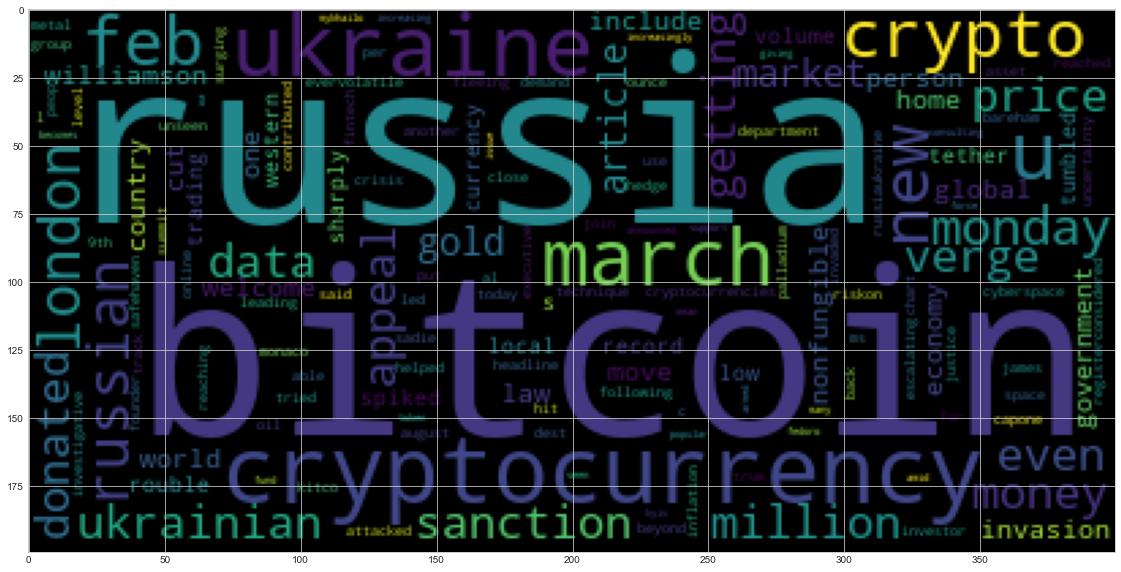

In [50]:
# Generate the Bitcoin word cloud
btc_words = ' '.join(btc_tokens_list)
wc = WordCloud().generate(btc_words)
plt.imshow(wc)

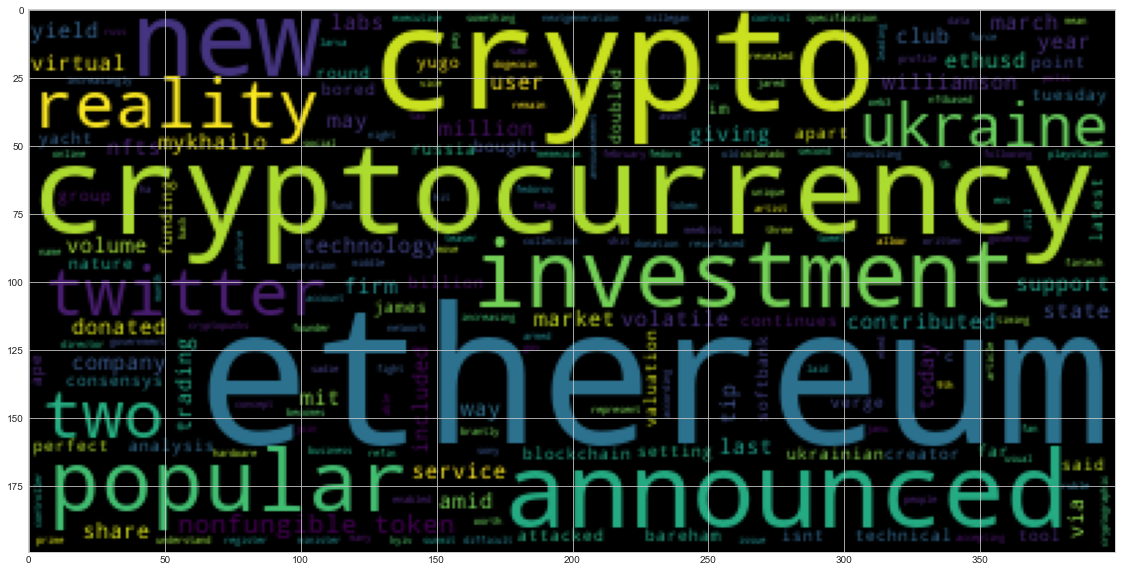

In [51]:
# Generate the Ethereum word cloud
eth_words = ' '.join(eth_tokens_list)
wc = WordCloud().generate(eth_words)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [52]:
import spacy
from spacy import displacy

In [53]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [54]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [55]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!

In [56]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [57]:
# Render the visualization
# YOUR CODE HERE!

In [58]:
# List all Entities
# YOUR CODE HERE!

---

### Ethereum NER

In [59]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

In [60]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [61]:
# Render the visualization
# YOUR CODE HERE!

In [62]:
# List all Entities
# YOUR CODE HERE!

---